# Dealing with Data: Assignment 1

Welcome to Dealing with Data!  In this first assignment, you'll:
* Get some familiarity with Python and Jupyter Notebooks 
* Explore a first data set, to try to answer the question "What are the returns to college?"

## Part 0: Background Survey

Please complete this background survey, so we have an idea of where you are coming from, and what your background and interests are!  https://forms.gle/EjULD49SCVstxXjo7

## **Part 1: Intro to Python** 

If you already know Python, great!  If not, open the notebook PythonTutorial.ipynb and do that tutorial first.  (Even if you already know Python, it might be a good idea to scan through that notebook to make sure that you are comfortable with it).

When you have finished, double-click the box below that says "TODO: Fill in..." and either type "I have completed the Python tutorial" or "I already know Python, I learned it _______" (and fill in the blank to explain where you learned it; for example "I learned it in CS106A at Stanford")

**ANSWER:** I learned it in COMP100 at Koç

## **Part 2: Examples: Exploring a data set!**

As a warm-up, we'll give you a bunch of examples of things you can do with a dataset derived from the Panel Study of Income Dynamics (PSID) collected at the University of Michigan. If you want to read more about the data or download the data for yourself you can go [here](https://psidonline.isr.umich.edu/).  For this part, you won't need to do anything new, just run these cells and try to understand what the Python code is doing.

### Part 2a: Loading a dataset and understanding the data structure

Run the following cell (click Shift+Enter) to load a data set!

In [1]:
import csv
datafile = open('week_1.csv', newline='')
dataDict = csv.DictReader(datafile, delimiter=",")
print("Great! Data is loaded")

Great! Data is loaded


We just loaded a dataset with a bunch of records about different people.  Run the following cell to see what variables we have about each person:

In [2]:
dataDict.fieldnames

['indiv_id',
 'F_income90',
 'F_attn_sm_college',
 'income00',
 'attn_sm_college',
 'age',
 'male',
 'female',
 'white',
 'black',
 'other',
 'married',
 'num_siblings',
 'birth_weight']

**The way to interpret these fields are the following:**
* indiv_id: Subject's Numerical ID 
* F_income90: Father's max income between 1990 and 1993
* F_attn_sm_college: Did the father attend some college?
* income00: Subject's max income in 2016, 2018 and 2020
* age: Subject's age in 2019
* male: does the subject identify as male?
* female: does the subject identify as female?
* white: does the subject identify as white?
* black: does the subject identify as Black?
* other: does the subject identify as another racial category
* married: is the subject married?
* num_siblings: how many siblings does the subject have?
* birth_weight: Subject's birthweight, measured in ounces; the codes 995, 998 and 999 mean that the data was not available or unknown.

Run the following cell to get a list of all of the records in the dataset:

In [3]:
records = [ row for row in dataDict ]

In [4]:
records[0]
len(records)

707

Each record in the list records is a Python OrderedDict.  So, "records" is essentially the same data structure as the list-of-dicts datastructure that we saw in our Python tutorial.

For example, let's look at the first record in the list records.  Run the following code to see the first record.

In [5]:
personZero = records[0]
print(personZero)

{'indiv_id': '5031', 'F_income90': '7011', 'F_attn_sm_college': '0', 'income00': '49612', 'attn_sm_college': '1', 'age': '36', 'male': '1', 'female': '0', 'white': '1', 'black': '0', 'other': '0', 'married': '0', 'num_siblings': '1', 'birth_weight': '88'}


Did this person attend college?  We can see from the above print out that they did, but we can also check that directly:

In [6]:
personZero["attn_sm_college"]

'1'

**Important!** the type of the entry we just printed out is a string.  It's the character '1', **not** the number 1.  In particular, if you want to do things like add these together, you need to either cast them as an integer (use int('1') to turn '1' into the number 1), or use an if statement like "if x=='1'", etc.  (See PythonTutorial.ipynb for more about types and the int() function).

### Part 2b: Doing basic computations (e.g., averages)

Let's compute the fraction of people in this dataset that attended college.  

In [7]:
collegeCount = 0
for record in records:
    if record["attn_sm_college"] == '1':
        collegeCount += 1
print(collegeCount, "out of", len(records), "people in this dataset attended college.")

381 out of 707 people in this dataset attended college.


Here's another way to compute the same thing, using Python's list comprehension syntax.  (Check out PythonTutorial.ipynb for more on list comprehensions).

In [8]:
collegeCount = sum( [int(record["attn_sm_college"]) for record in records])
print(collegeCount, "out of", len(records), "people in this dataset attended college.")

381 out of 707 people in this dataset attended college.


Of the folks who attended college, let's compute for what percentage of them are women:

In [9]:
femaleFractionAmongCollege = 0
for record in records:
    if record["attn_sm_college"] == '1':
        femaleFractionAmongCollege += int(record['female']) # note that we cast this as an "int" so that we can add them up
femaleFractionAmongCollege = femaleFractionAmongCollege / collegeCount # turn the sum into an average 
print("Of the folks in this dataset who attended some college, the fraction that is female is:", round(femaleFractionAmongCollege,2))

Of the folks in this dataset who attended some college, the fraction that is female is: 0.48


### Part 2c: Plotting things!

Let's look at the distribution of ages in this dataset.  We'll make a histogram.  Below is an example that you can generalize when you want to make your own histograms later.

In [10]:
# import some packages to help us plot things.  
# (Don't worry too much about this, just know that you have to run these lines 
# when you want to plot things)
from matplotlib import pyplot as plt
import numpy as np

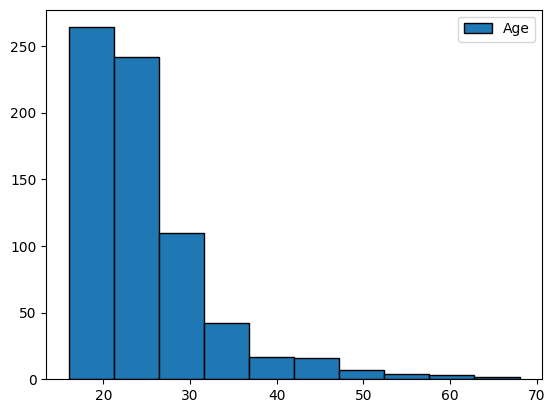

In [11]:
# let's make a histogram of the ages!
ages = [int(record['age']) for record in records] # this gives us a list of all of the ages in our dataset
plt.hist(ages, label="Age",edgecolor='black') # Make a histogram out of the ages data
plt.legend(loc='upper right') # Add a legend to our histogram
plt.show() # show the plot!

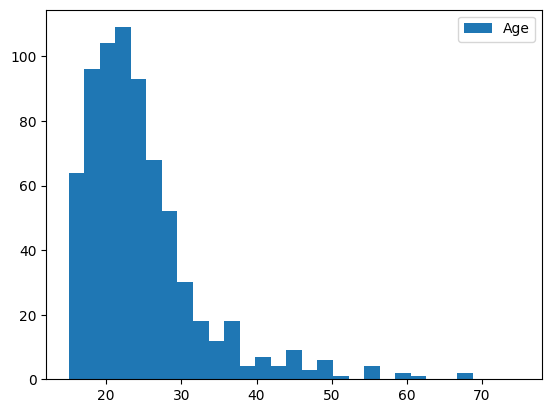

In [12]:
# we can adjust the bins.  The following makes 30 equally-sized bins between 15 and 75:
bins = np.linspace(15,75,30)
# Now do the same histogram stuff again:
plt.hist(ages, bins, label="Age")
plt.legend(loc='upper right')
plt.show()

Now let's break this up between college-goers and non-college-goers:

In [13]:
# make lists ages_college and ages_nocollege of the ages of folks who have some college and no college, respectively.
ages_college = []
ages_nocollege = []
for record in records:
    if record["attn_sm_college"] == "1":
        ages_college.append(int(record['age']))
    else:
        ages_nocollege.append(int(record['age']))

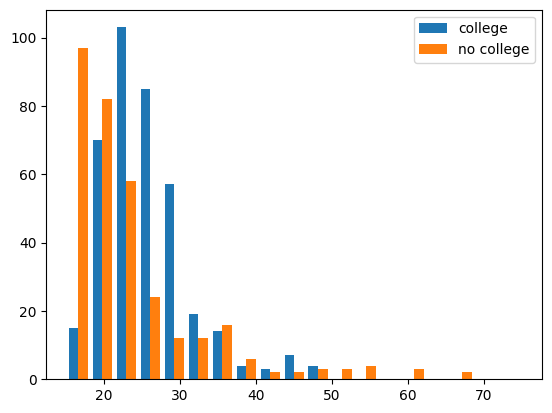

In [14]:
# Now make histograms of both!
plt.hist([ages_college, ages_nocollege], np.linspace(15,75,20), label=["college", "no college"])
plt.legend(loc='upper right')
plt.show()

Think about the above plot.  What is it telling you?  Does that make sense?

Finally, let's make a scatter plot of father's income vs child's income:

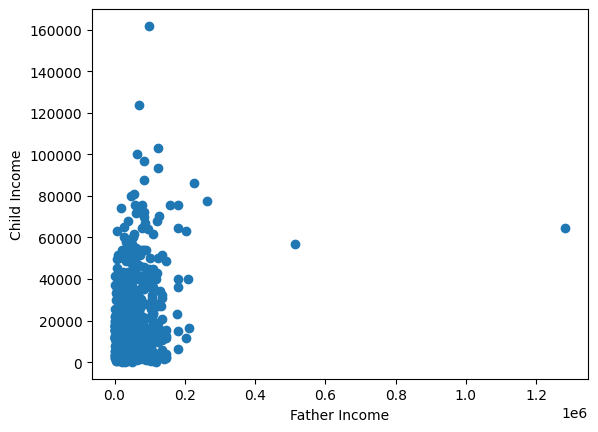

In [15]:
# make two lists, one of child's income and one of father's income:
incomeList = [ float(record["income00"]) for record in records ]
fatherIncomeList = [ float(record["F_income90"]) for record in records ]

# Now we'll make a scatter plot:
plt.scatter(fatherIncomeList, incomeList)
plt.ylabel("Child Income")
plt.xlabel("Father Income")
plt.show()

Hmm, that's a bit hard to see because of the outliers.  I'm going to reset the axes limits to zoom in a bit:

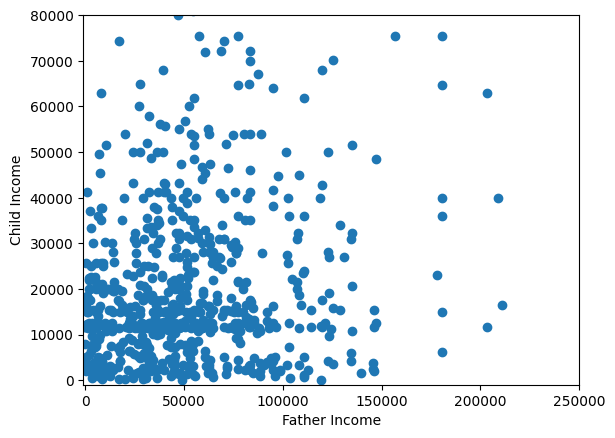

In [16]:
plt.ylim(-1000,80000)
plt.xlim(-1000,250000)
plt.scatter(fatherIncomeList, incomeList)
plt.ylabel("Child Income")
plt.xlabel("Father Income")
plt.show()

For some purposes, things might be clearer when we work with a *logarithmic scale*.  One reason is that it helps us clearly see exponential trends; another reason is that log is a concave function, and so outliers show up as less outlier-y.  We can specify that we'd like to use logs on the plot above as follows:

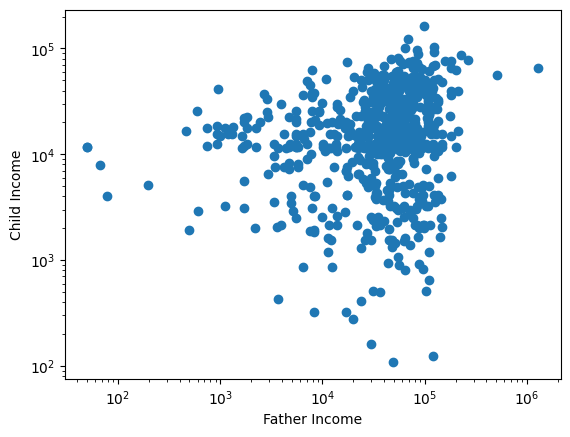

In [17]:
plt.scatter(fatherIncomeList, incomeList)
plt.ylabel("Child Income")
plt.xlabel("Father Income")
plt.xscale('log')
plt.yscale('log')
plt.show()

Wow, it sure does seems like there are a lot of options for plotting things!  How can we remember all of these?  And what if you want to do something not covered by these examples?  The help() function can give you some pointers here:

In [18]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

However, the output of "help" can sometimes be a bit overwhelming, especially if you are new to python.  Searching on the internet is also really helpful!  For example, you can search for "matplotlib scatter plot log scale" and you'll get a bunch of examples for how to reset the axes to a log scale.  (Fact: Mary actually did this when writing the code above since she forgot how...)

### Part 2d: Logarithms and other math things.

As above, you may want to work with logarithms in the data.  Python doesn't know about logarithms by default, but you can tell it by importing log from the "numpy" package, as follows: 

In [19]:
# Import log
from numpy import log
# check that log is doing what it should be:
print(log(2.718)) # this should be pretty close to 1, since 2.718 is pretty close to e
print(log(8)/log(2)) # this prints out the log of 8 base 2, which should be 3

# NOTE: We have already imported the numpy package as "np", so you can also access log 
# by using np.log, even if you didn't run the line "from numpy import log":
print(np.log(2.718))

0.999896315728952
3.0
0.999896315728952


Now, for example, if we wanted to know about the average *log* of income in our data set, we could compute that as follows:

In [20]:
avg_log_income = sum([ log(float(x["income00"])) for x in records ])/len(records)
print("The average [log of income] in this dataset is", avg_log_income)

The average [log of income] in this dataset is 9.482705318675492


You may also want to do things like exponentiation, or to use the number "e".  In Python, exponentiation is given by two stars:

In [21]:
print(2**3)

8


You can get the number e (the base of the natural log, approximately 2.718) by:

In [22]:
# Note that we have already imported numpy as np.
# If you hadn't run that command, np wouldn't be defined, and this would throw an error.
print(np.e)

2.718281828459045


## Part 3: Estimating the returns to college?

### Now it's your turn!  

### Part 3a: Write code to do the following:
* Compute the average income of folks in the dataset who went to college
* Compute the average income of folks in the dataset who did not go to college
* Take the difference.  This is the **observational effect of going to college on income.**


### HINT: 
Look at the eaxmples that we saw above.  We saw an example of how to compute the fraction of women in the dataset who attended college.  Can you adapt that example to compute the average income of people in the dataset who attended college?

In [23]:
## TODO: Fill in code here!  
# Your code should print out 
# "The observational effect of going to college in this dataset is: ____"
no_college_income = sum(float(record['income00']) if record['attn_sm_college'] == '0' else 0 for record in records)
college_income = sum(float(record['income00']) if record['attn_sm_college'] == '1' else 0 for record in records)

avg_college_income = float(college_income / collegeCount)
avg_no_college_income = float(no_college_income / (len(records) - collegeCount))

effect_college_on_income = avg_college_income - avg_no_college_income

print(f"The observational effect of going to college in this dataset is: {round(effect_college_on_income,2)}")

The observational effect of going to college in this dataset is: 10052.59


In [24]:
f"{round((effect_college_on_income/avg_no_college_income)*100,2)}%"

'65.77%'

### Part 3b: Think a bit about it...

Do you think this effect is "big" or "small"?  How would you decide?

**ANSWER:** **TODO:** Double-click on this cell and say whether or not you think this effect is "big" or "small."  If you don't know, what information might you want to figure that out?  (And if that's information that you can compute, you can optionally try to compute it!) 

At first glance, it seems like a small effect. However, I changed my mind after reviewing the average incomes of people who did not go to college (*avg_no_college_income:* \\$15,283) and people who went the college (*avg_college_income:* \\$25,336). The observational effect is considerably big, with college graduates making ~65% more money on average than people who did not go to college. This implies that *avg_no_college_income* would increase by 65% if the individuals had pursued a college education. While we cannot strictly say that going the college or not is the only variable for income, there might be a positive "correlation" between going to college and income. 

In [36]:
# TODO: If you think it would help, do a computation to decide if this effect is big or small.
print(f"Average income of college graduates: ${round(avg_college_income,2)}")
print(f"Average income of non-college-educated: ${round(avg_no_college_income,2)}")
print(f"Effect of college education on income: ${round(effect_college_on_income,2)}")

Average income of college graduates: $25336.01
Average income of non-college-educated: $15283.42
Effect of college education on income: $10052.59


### OPTIONAL: Part 3c: Do it in logarithms!

**This part is optional!** Repeat parts 3a and 3b looking at the average **logarithm** of income.  Does this make you think differently about the answers?

In [38]:
# TODO: If you choose to do this part, repeat your code from above with some logarithms.
college_log_income = sum([log(float(record['income00'])) if record['attn_sm_college'] == '1' else 0 for record in records])
college_log_income_avg = float(college_log_income / collegeCount)
no_college_log_income = sum([log(float(record['income00'])) if record['attn_sm_college'] == "0" else 0 for record in records])
no_college_log_income_avg = float(no_college_log_income/(len(records)-collegeCount))
effect_log_college_on_income = college_log_income_avg - no_college_log_income_avg
percentage_increase_of_income = (effect_log_college_on_income/no_college_log_income_avg)*100
print(f"The log of observational effect of going to college in this dataset is: {round(effect_log_college_on_income,5)}")

The log of observational effect of going to college in this dataset is: 0.59861


**ANSWER: TODO** Double-click on this cell and say whether or not you think the effect is "big" or "small", and why. <br>
I am not sure about whether I calculated the *effect_log_college_on_income* correctly. However, the ratio of *effect_log_college_on_income (0.5986)* to *no_college_log_income_avg (9.16)* is *0.06536*, which is very close to the ratio in the 3b. The percentage increase due to the college education on earnings is *6.535%* <br><br>
*In fact, the multiplication of "percentage increase" with 10 would produce value (~65%) which is very close  with the one in the 3b. This might be related to the log scale, not totally sure :)*

In [41]:
print(f"Log of Average income of college graduates: {round(college_log_income_avg,3)}")
print(f"Log of Average income of non-college-educated: {round(no_college_log_income_avg,3)}")
print(f"Log of Effect of college education on income: {round(effect_log_college_on_income,4)}")
print(f"The percentage increase : {round(percentage_increase_of_income,3)}")

Log of Average income of college graduates: 9.759
Log of Average income of non-college-educated: 9.16
Log of Effect of college education on income: 0.5986
The percentage increase : 6.535


## Part 4: Thinking more about it.

### We discussed in class several reasons why the exercise above may not captual the *causal* effect of college on earnings.  Think of one or two reasons that you can explore with this dataset, and explore them!

Possible things you could look at include:
* Maybe it's the case that folks who tend to go to college have more educated and/or richer parents?  Can you document that in this dataset?
* Maybe it's the case that folks who tend to go to college are of a different race/gender/age than those who don't?  Can you document that in this dataset?

**Note 0:** *If you are new to Python, it might be challenging to figure out how to do the thing you want to do.  In that case, it's fine to just answer Part 4a below and say what you _would_ do, if you knew how.  Parts 4b and 4c are optional.  (But if you are in this situation, you can come to Mary's office hours, or ask a friend, to get more help with Python!)*

**Note 1:** *Even if you aren't new to Python, you don't need to do anything fancy here, and you are definitely not going to get to the bottom of "what are the returns to college?" based on this simplified dataset.  Instead, the idea is just to identify something that might be a problem for interpreting your findings in Part 3 as causal, and doing a quick sanity-check to see if it matters.*



### Part 4a: What do you want to investigate and why? 

Answer by double-clicking the box below.  Try to be as precise as possible.

**ANSWER:** TODO: Write here what you want to investigate, and why.  
I want to look at whether or not folks who went to college typically had richer parents. In particular, I will compute the following quantities: 
1) Average of fathers' incomes whose children who did/didn't go the college and the observational effect of fathers' incomes on going the college.
2) Distribution of fathers' incomes whose children who did/didn't go the college over specified income groups.
3) Scatter plot of father incomes and their children incomes who did/didn't go the college (x: Father income of college graduated child y:College graduated child income and visa versa).

**This might affect the estimate in Part 3 because we take other variables into account. We might get more "accurate" estimation, or even more confusing :)** 

(For example, "I want to look at whether or not folks who went to college typically had more educated parents.  In particular, I will compute the following quantities: ____  This might affect the estimate in Part 3 because....")

### Part 4b: Investigate it!

**1) Averages of father incomes of children who did/didn't go the college and the observational effect of father income on going the college.**

In [42]:
parents_income_list = [float(record['F_income90']) for record in records]

In [43]:
#TODO Write some code to investigate what you want to investigate.
no_college_parents_avg_income = sum(float(record['F_income90']) if record['attn_sm_college'] == '0' else 0 for record in records)/(len(records)-collegeCount) 
college_parents_avg_income = sum(float(record['F_income90']) if record['attn_sm_college'] == '1' else 0 for record in records)/collegeCount
diff = college_parents_avg_income - no_college_parents_avg_income
percentage = round(diff/no_college_parents_avg_income,2)*100 

print(f"The average of father incomes of college graduates: ${round(college_parents_avg_income,2)}")
print(f"The average of father incomes of non-college-educated children: ${round(no_college_parents_avg_income,2)}")
print(f"Percentage : difference / (no_college_parents_avg_income) {round(diff/no_college_parents_avg_income,2)*100}%")
print(f"Well, we might say that an average father of a non-college-educated child would have had the chance to see his son's or daughter's graduation if he had an income 50% higher than the current average income")

The average of father incomes of college graduates: $64837.01
The average of father incomes of non-college-educated children: $43230.93
Percentage : difference / (no_college_parents_avg_income) 50.0%
Well, we might say that an average father of a non-college-educated child would have had the chance to see his son's or daughter's graduation if he had an income 50% higher than the current average income


**2) Let's investigate the distribution of incomes of parents over specified income groups**
<br>
<br> The numbers randomly/intuitively selected
- very rich : belongs to the top 85%
- rich : belongs to the 70%
- middle : belongs to the 50%
- poor : poor

In [44]:
#Start with father incomes whose children went to college

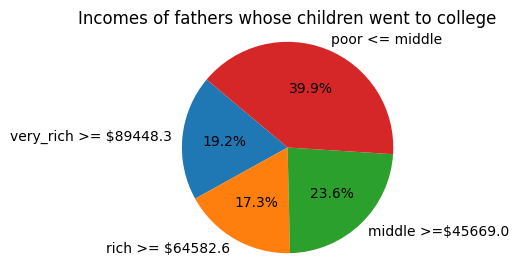

In [51]:
#thresholds & epsilon totally randomly selected
very_rich_thresh = np.percentile(parents_income_list,85)
rich_thresh = np.percentile(parents_income_list,70)
middle_thresh = np.percentile(parents_income_list,50)

#records
very_rich_parents = []
rich_parents = []
middle_parents = []
poor_parents = []

for record in records:
    if record['attn_sm_college'] == "0":
        continue
    
    fathers_income = float(record['F_income90'])
    if fathers_income >= very_rich_thresh:
        very_rich_parents.append(record)
    elif fathers_income >= rich_thresh:
        rich_parents.append(record)
    elif fathers_income >= middle_thresh:
        middle_parents.append(record)
    else:
        poor_parents.append(record)

total_records_len = len(very_rich_parents) + len(rich_parents) + len(middle_parents) + len(poor_parents)
very_rich = round((len(very_rich_parents)/total_records_len) * 100,2)
rich = round((len(rich_parents)/total_records_len) * 100,2)
middle = round((len(middle_parents)/total_records_len) * 100,2)
poor = round((len(poor_parents)/total_records_len) * 100,2)

classes = [f"very_rich >= ${round(very_rich_thresh,2)}",f"rich >= ${(round(rich_thresh,2))}",f"middle >=${(round(middle_thresh,2))}",f"poor <= middle"]
values = [very_rich,rich,middle,poor]
colors = ['red','green','blue','yellow']
plt.figure(figsize=(3,3))
plt.pie(values,labels=classes,autopct='%1.1f%%', startangle=140)
plt.title("Incomes of fathers whose children went to college")
plt.axis('equal')
plt.show()

In [57]:
#Also look at the incomes of parents whose child did not go to college

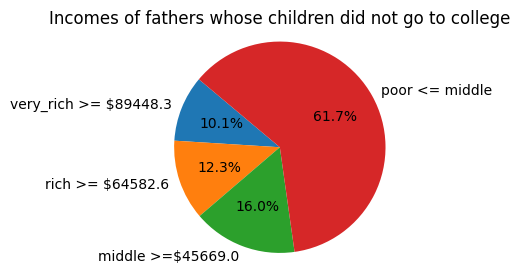

In [58]:
#records
very_rich_parents = []
rich_parents = []
middle_parents = []
poor_parents = []

for record in records:
    if record['attn_sm_college'] == "1":
        continue
    
    fathers_income = float(record['F_income90'])
    if fathers_income >= very_rich_thresh:
        very_rich_parents.append(record)
    elif fathers_income >= rich_thresh:
        rich_parents.append(record)
    elif fathers_income >= middle_thresh:
        middle_parents.append(record)
    else:
        poor_parents.append(record)

total_records_len = len(very_rich_parents) + len(rich_parents) + len(middle_parents) + len(poor_parents)
very_rich = round((len(very_rich_parents)/total_records_len) * 100,2)
rich = round((len(rich_parents)/total_records_len) * 100,2)
middle = round((len(middle_parents)/total_records_len) * 100,2)
poor = round((len(poor_parents)/total_records_len) * 100,2)

classes = [f"very_rich >= ${round(very_rich_thresh,2)}",f"rich >= ${(round(rich_thresh,2))}",f"middle >=${(round(middle_thresh,2))}",f"poor <= middle"]
values = [very_rich,rich,middle,poor]
colors = ['red','green','blue','yellow']
plt.figure(figsize=(3,3))
plt.pie(values,labels=classes,autopct='%1.1f%%', startangle=140)
plt.title("Incomes of fathers whose children did not go to college")
plt.axis('equal')
plt.show()

*- We see more fathers on rich category if the children are college graduate (very_rich + rich)*
<br>
*- We see more fathers on poor category if the children are non-college-educated (poor)*

**3) Scatter plot of father income and their children who did/didn't go the college (x: Father income of college graduated child y:College graduated child income).**

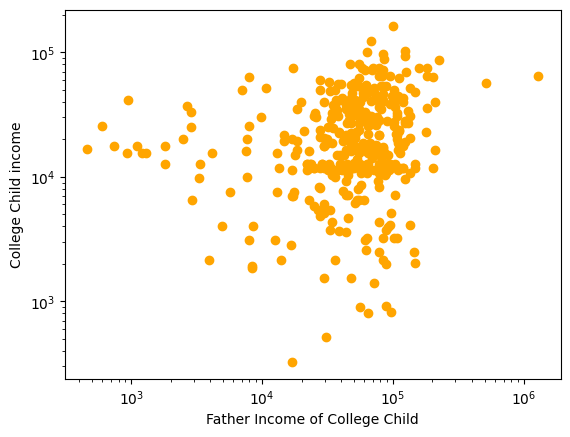

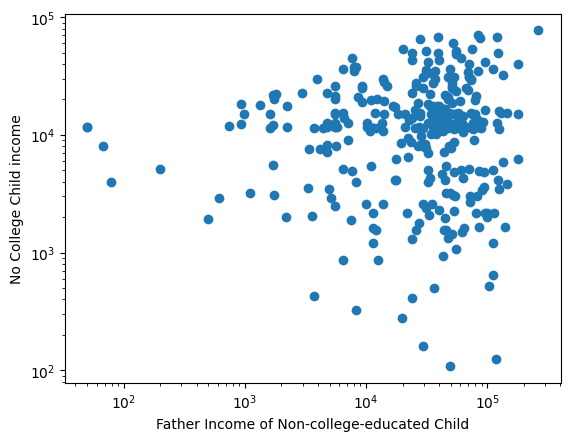

In [59]:
#records
parents_college_income_list = []
child_college_income_list = []
parents_no_college_income_list = []
child_no_college_income_list = []

for record in records:
    fathers_income = float(record['F_income90'])
    childs_income = float(record['income00'])
    if record['attn_sm_college'] == "0":
        parents_no_college_income_list.append(fathers_income)
        child_no_college_income_list.append(childs_income)
    else:
        parents_college_income_list.append(fathers_income)
        child_college_income_list.append(childs_income)
      
plt.scatter(parents_college_income_list, child_college_income_list,color="orange")
plt.ylabel("College Child income")
plt.xlabel('Father Income of College Child')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.scatter(parents_no_college_income_list, child_no_college_income_list)
plt.ylabel("No College Child income")
plt.xlabel('Father Income of Non-college-educated Child')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Part 4c: What's the take-away?

Write a sentence or two by double-clicking the box below, about how your results above affect what you think about the effect of college on earnings.

**ANSWER:** TODO: Conclusion goes here. 
<br><br>
**The father income on college education** <br>
    - From the first part of 4b, we might conclude that college graduates have richer parents. <br>
    - We can strengthen this argument by looking into the distrubution of incomes in the second part of 4b. <br>
    - In the third part of 4b, We can also say that the data points are more closely cumulated if the child went to college. (Visually speaking). I find it interesting because it implies that a child have more possibility to have "typical" salary if he/she can go to college. We are better at predicting salaries of college graduates compared to non-college-educated people. Just a thought, not sure.
<br><br>
**The father income on earnings** <br>
    - In part 3, we see that there might be a positive correlation between going college and income. <br>
    - In part 4, we see that there might be a positive correlation between going college and father income. The more the father income is, the more likely its for his child to attend college. <br>

**Take-Away:** We might conclude that children with rich (rich + very_rich) parents have greater potential to generate more income since they can afford college education. Rich create rich.
<br>
*of course oversimplified :)*